In [1]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# SVD decomposition and dimension reduction

The following datasets contains 10000 vectorized images of the size 8x8 pixels with generated bars.

 - bars.csv - original data
 - bars_noise20.csv and bars_noise50.csv - the generated noise was distributed into original dataset

In [2]:
X = pd.read_csv('data_dimension_reduction/bars.csv', header=None).values
X_noise_20 = pd.read_csv('data_dimension_reduction/bars_noise20.csv', header=None).values
X_noise_50 = pd.read_csv('data_dimension_reduction/bars_noise50.csv', header=None).values

In [ ]:
X.shape

In [ ]:
X[1]

In [ ]:
X_noise_20[1]

In [6]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

In [ ]:
show_image(X[2])

In [ ]:
show_image(X_noise_20[2])

In [ ]:
show_image(X_noise_50[2])

## SVD decompostioton

In [ ]:
U, s, V_T = np.linalg.svd(X, full_matrices=True)
U.shape, s.shape, V_T.shape

In [ ]:
s

What does the values in vector **s** represent?

### Reconstruct complete matrix and check error

In [ ]:
np.diag(s)

In [ ]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
X-R

### Use only 5 main vectors (which represent reduction to 5 dimensions). Create reconstructed matrix and compare it with original one.
- https://csiu.github.io/blog//img/figure/2017-04-16/svd.png
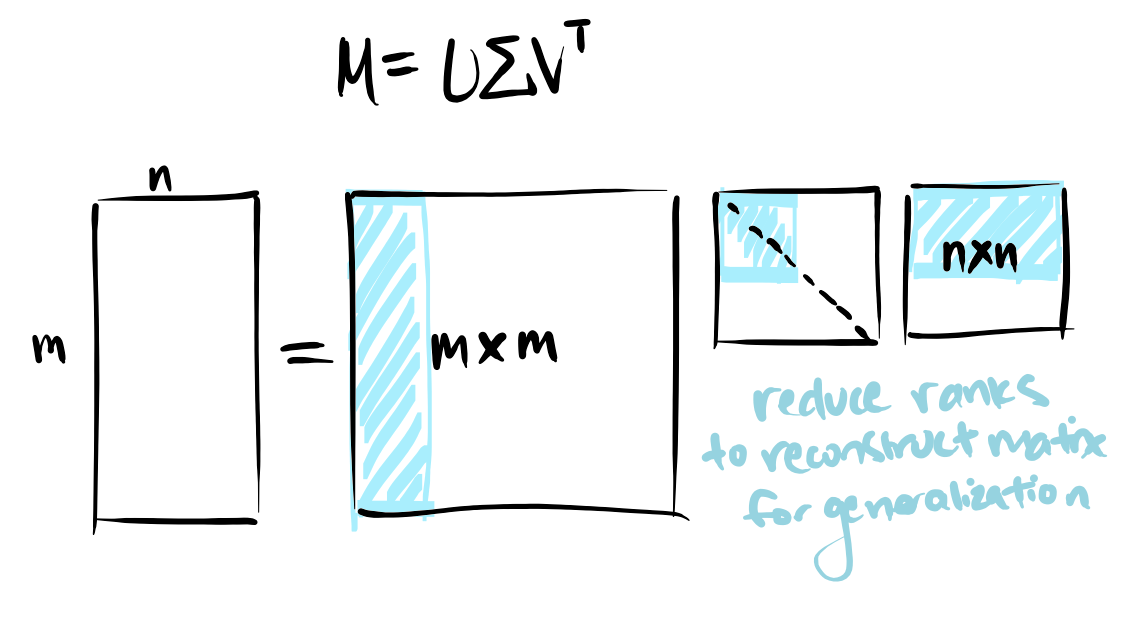

In [ ]:
U[:, :5]

In [ ]:
V_T[:5, :]

## Where can we find vector space in reduced dimension?

In [ ]:
U[:, :5].shape

In [ ]:
U[:, :5]

## Reconstruction from reduced space and error calculation

In [ ]:
R = U[:,:5].dot(np.diag(s[:5])).dot(V_T[:5, :])
R.shape

In [ ]:
show_image(X[2])
plt.title('Original image')

In [ ]:
show_image(R[2])
plt.title('Reconstructed image when only 5 dimensions are used')

What is the error for reconstructed picture?

In [ ]:
print(X[2]-R[2])

What is the error for reconstructed pictures?

In [ ]:
print(X-R)

In [ ]:
np.linalg.norm(X-R)

# Individual tasks

- **Objective of first task is to use reduction dimension to reduce noise in the synthetic datasets.**

- **Second task should demonstare usage of dimension reductions techniques for 2D visualization and showing clustering results in that vis.**

---

## Task 1(1p) : Complete following tasks for dimension reduction using SVD over our toy datasets (bars, bars_noise20, bars_noise50)

### Qustion: What does the number from previous cell mean? What is the output from *np.linalg.norm* function?

Answer: 

### Find optimal number of features/dimension for our toy datasets
- Our datasets **X_noise_20** and **X_noise_50** contain noise, we want to use dimension reduction to eliminate impact of noise in our dataset
- **Try different number of dimensions for dimension reduction, calculate Frobenius norm for reconstructed and original matrix, create plot with reconstruction error values afterwards.** Is 5,10,15,20,...,40 dimensions enough if the original data had 64 dimensions?
- Repeat proces for datasets **X**, **X_noise_20**, **X_noise_50**


### Interpret results based on previous graphs. What is the best number of dimensions? Why? Is there any connection between best dimension and process "how" the images were generated and what information they represent?

Interpretation:

### Can you "recover" information for following image?

In [ ]:
show_image(X_noise_50[2])

#### Does the dimension reduction have effect for noise reduction?
1. Visualize original image *X\[2\]* in form of 8x8 image.
2. Visualize appropriate image with with high noise *X_noise_50\[2\]*.
3. Perform dimension reduction for X_noise_50 and choose a best dimension.
4. Visualize reconstructed image (when only several dimensions were used) of image with noise. Did the use of reduced space helped?

## Task 2(1p) : The use of dimension reduction methods for visualization purposes

We have tried some clustering for **Red wine quality data** last week. I have copied the most important cells into this notebook.

1. Fill in any clustering method for our dataset **Red wine quality data**, you can use already scaled matrix **X_scaled**.
2. Lets use other dimension reduction techniques: PCA and TSNE from sklearn library and get 2D space representation for our matrix **X_scaled**.
3. Use 2D representation from dimension reduction methods for 2D visualization of **Red wine quality data** and use color for displaying clusters found in matrix **X_scaled** - create at least two scatter plots for data points and use cluster_id as point's color.Create multiple visualization based on reduction to two dimensions for raw and preprocessed data.

- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
df = pd.read_csv('data_clustering/winequality-red.csv')
df_only_numeric = df.select_dtypes(np.number).drop('quality', axis=1)
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df_only_numeric.values)

### Clustering

Use any clustering method for preprocessed data.

Be aware to apply clustering for **X_scaled**, which is n-diminensional data. Do not use clustering only on 2D representation after dimension reduction. 

### 2D vis

#### Should we rescale the data before using dimension reduction?
- I have copied some answers on previous question from discussions.

"In summary, use the correlation matrix R when within-variable range and scale widely differs, and use the covariance matrix C to preserve variance if the range and scale of variables is similar or in the same units of measure." https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance

"There are multiple versions of principal component algorithms, but most select a first principal component that maximizes variance. That only makes sense if a one unit difference in each of your measures is equally important. Even if your measures are in the same units, say dollars, that may not be true. If your measures are in different units, say one in inches and one in dollars, it would only be by coincidence that one inch was equally important as one dollar." https://www.quora.com/Why-do-you-need-to-scale-your-data-before-applying-PCA

"If you have data in different scales, the dimensions with larger scale will dominate, this is probably not what you want." https://www.quora.com/Why-do-you-need-to-scale-your-data-before-applying-PCA

"Generally speaking, Normalization is needed before PCA. The key to the problem is the order of feature selection, and it's depends on the method of feature selection." https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization

"t-SNE is sensitive to feature-wise normalization; and no theory says that such normalization will in general improve or degrade results, it fully depends on your data and expectation. If you can make more sense with maps from un-normalized data, then it indicates that normalization is not good for your study." https://www.reddit.com/r/MachineLearning/comments/5ygh1q/d_data_preprocessing_tips_for_tsne/

"rescaling is necessary if you want the different dimensions to be treated with equal importance, since the 2-norm will be more heavily influenced by dimensions with large variance." https://stats.stackexchange.com/questions/164917/should-data-be-centeredscaled-before-applying-t-sne

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Sample output of 2D visualization obtained by PCA method with labels from k-Means clustering

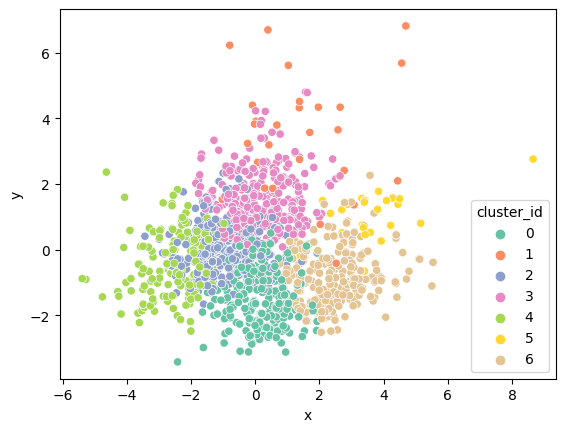

#### Just a meme

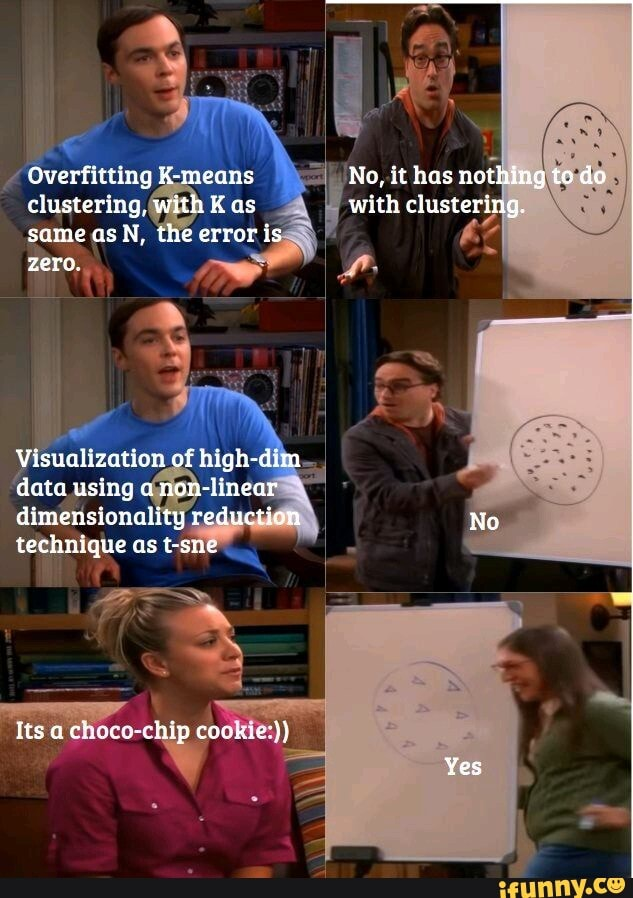